# Spectral Clustering

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Encoded_data_3000_V2.csv")
df

,Plant_Id,Category_Bamboos,Category_Bromeliads,Category_Cacti & Succulents,Category_Climbers,Category_Creepers & Vines,Category_Ferns,Category_Flowering Pot Plants,Category_Fruit Plants,Category_Grasses & Grass like plants,...,Plant_Form_Climbing or growing on support,Plant_Form_Columnar,Plant_Form_Irregular,Plant_Form_Low spreading,Plant_Form_Oval,Plant_Form_Pyramidal,Plant_Form_Spherical or rounded,Plant_Form_Spreading,Plant_Form_Upright or Erect,Plant_Form_Weeping
0,1,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,2,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,4,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,5,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,7,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2357,2996,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2358,2997,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2359,2998,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,1,0
2360,2999,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [3]:
data = df

In [4]:
data = data.set_index('Plant_Id')
data

,Category_Bamboos,Category_Bromeliads,Category_Cacti & Succulents,Category_Climbers,Category_Creepers & Vines,Category_Ferns,Category_Flowering Pot Plants,Category_Fruit Plants,Category_Grasses & Grass like plants,Category_Groundcovers,...,Plant_Form_Climbing or growing on support,Plant_Form_Columnar,Plant_Form_Irregular,Plant_Form_Low spreading,Plant_Form_Oval,Plant_Form_Pyramidal,Plant_Form_Spherical or rounded,Plant_Form_Spreading,Plant_Form_Upright or Erect,Plant_Form_Weeping
Plant_Id,,,,,,,,,,,,,,,,,,,,,
1,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
7,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2998,1,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,1,1,0


In [5]:
# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the data
data = scaler.fit_transform(data)

In [6]:
data

array([[-0.18723506, -0.13290899,  3.93922359, ..., -0.94398776,
         0.8144816 , -0.15583477],
       [-0.18723506, -0.13290899,  3.93922359, ..., -0.94398776,
         0.8144816 , -0.15583477],
       [-0.18723506, -0.13290899,  3.93922359, ..., -0.94398776,
         0.8144816 , -0.15583477],
       ...,
       [ 5.34088008, -0.13290899, -0.25385713, ...,  1.05933577,
         0.8144816 , -0.15583477],
       [-0.18723506, -0.13290899, -0.25385713, ..., -0.94398776,
         0.8144816 , -0.15583477],
       [-0.18723506, -0.13290899, -0.25385713, ...,  1.05933577,
         0.8144816 , -0.15583477]])

In [8]:
# Define the number of clusters
k = 10

# Perform spectral clustering
spectral_clustering = SpectralClustering(n_clusters=k, random_state=42)
clusters = spectral_clustering.fit_predict(data)

D:\Anaconda\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:392: UserWarning: Exited at iteration 239 with accuracies 
[1.45399020e-15 4.54941407e-05 2.09411607e-05 3.89009464e-05
 4.74513186e-05 3.14926507e-05 2.87094531e-05 3.02266449e-05
 3.52215218e-05 3.11362783e-05 3.10292812e-05]
not reaching the requested tolerance 3.5196542739868164e-05.
Use iteration 233 instead with accuracy 
3.0011259601002673e-05.

  _, diffusion_map = lobpcg(
D:\Anaconda\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:392: UserWarning: Exited postprocessing with accuracies 
[3.13500784e-15 4.64523043e-05 2.09160719e-05 3.87803891e-05
 2.70125115e-05 3.83366307e-05 2.99675423e-05 3.07946243e-05
 3.56588996e-05 3.08106554e-05 3.13942262e-05]
not reaching the requested tolerance 3.5196542739868164e-05.
  _, diff

In [9]:
spectral_clustering

SpectralClustering(n_clusters=10, random_state=42)

In [10]:
clusters

array([0, 0, 0, ..., 0, 0, 0])

In [11]:
# Number of data points in each cluster
cluster_counts = np.bincount(clusters)
print("Number of data points in each cluster:")
for i, count in enumerate(cluster_counts):
    print(f"Cluster {i}: {count} data points")

# Compute silhouette score
silhouette_avg = silhouette_score(data, clusters)
print(f"\nSilhouette Score: {silhouette_avg}")

Number of data points in each cluster:
Cluster 0: 2353 data points
Cluster 1: 1 data points
Cluster 2: 1 data points
Cluster 3: 1 data points
Cluster 4: 1 data points
Cluster 5: 1 data points
Cluster 6: 1 data points
Cluster 7: 1 data points
Cluster 8: 1 data points
Cluster 9: 1 data points

Silhouette Score: 0.30355695386979314


### Hyperparameter Tuning

D:\Anaconda\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:392: UserWarning: Exited at iteration 342 with accuracies 
[1.94851528e-15 1.51065635e-05 2.15511516e-05 1.42637895e-05
 1.43707400e-05 1.86396453e-05 1.45765658e-05 2.58566192e-05
 2.95412252e-05 2.61748803e-05 2.44858061e-05 2.76558533e-05
 3.36104819e-05 4.89859076e-05 2.61601793e-05 3.44613754e-05]
not reaching the requested tolerance 3.5196542739868164e-05.
Use iteration 342 instead with accuracy 
2.3465049011183607e-05.

  _, diffusion_map = lobpcg(
D:\Anaconda\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:392: UserWarning: Exited postprocessing with accuracies 
[3.74629935e-15 1.51065635e-05 2.15511517e-05 1.42637895e-05
 1.43707402e-05 1.86396452e-05 1.45765659e-05 2.58566193e-05
 2.95412250e-05 2.61748806e-05 2.44858063

For k = 15:
Silhouette Score: 0.2982198476284165
Number of data points in Cluster 0: 4
Number of data points in Cluster 1: 1
Number of data points in Cluster 2: 1
Number of data points in Cluster 3: 1
Number of data points in Cluster 4: 1
Number of data points in Cluster 5: 1
Number of data points in Cluster 6: 4
Number of data points in Cluster 7: 1
Number of data points in Cluster 8: 1
Number of data points in Cluster 9: 1
Number of data points in Cluster 10: 1
Number of data points in Cluster 11: 1
Number of data points in Cluster 12: 2340
Number of data points in Cluster 13: 1
Number of data points in Cluster 14: 3


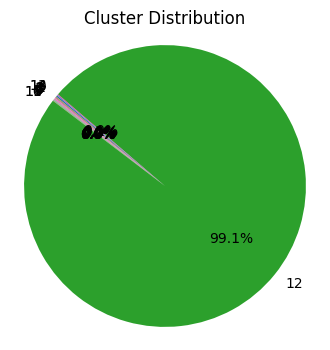

D:\Anaconda\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:392: UserWarning: Exited at iteration 348 with accuracies 
[1.92944966e-15 9.39843501e-06 1.55754006e-05 1.94111375e-05
 2.34921779e-05 1.21242263e-05 1.25508082e-05 2.33086121e-05
 1.39323354e-05 2.68383345e-05 2.05820062e-05 4.24640359e-05
 2.65768022e-05 2.37598464e-05 3.15121427e-05 2.16823212e-05
 2.98851379e-05 2.51199954e-05 4.72579507e-05 3.16864641e-05
 3.46051696e-05]
not reaching the requested tolerance 3.5196542739868164e-05.
Use iteration 348 instead with accuracy 
2.3417301894101246e-05.

  _, diffusion_map = lobpcg(
D:\Anaconda\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:392: UserWarning: Exited postprocessing with accuracies 
[4.35900835e-15 9.39843506e-06 1.55754008e-05 1.94111364e-05
 2.34921790e-05 1.2124225

For k = 20:
Silhouette Score: 0.04828853050402363
Number of data points in Cluster 0: 2
Number of data points in Cluster 1: 1
Number of data points in Cluster 2: 1
Number of data points in Cluster 3: 1
Number of data points in Cluster 4: 1
Number of data points in Cluster 5: 1
Number of data points in Cluster 6: 1
Number of data points in Cluster 7: 1
Number of data points in Cluster 8: 0
Number of data points in Cluster 9: 1
Number of data points in Cluster 10: 6
Number of data points in Cluster 11: 2338
Number of data points in Cluster 12: 0
Number of data points in Cluster 13: 1
Number of data points in Cluster 14: 1
Number of data points in Cluster 15: 4
Number of data points in Cluster 16: 0
Number of data points in Cluster 17: 0
Number of data points in Cluster 18: 1
Number of data points in Cluster 19: 1


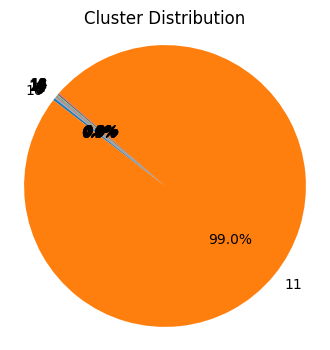

D:\Anaconda\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:392: UserWarning: Exited at iteration 512 with accuracies 
[2.22820330e-15 9.32614618e-06 1.10962304e-05 9.75735951e-06
 9.73007409e-06 1.12186209e-05 1.70623383e-05 1.32522226e-05
 1.31150253e-05 8.25311305e-06 1.66208534e-05 1.18698561e-05
 1.75547439e-05 1.35505172e-05 1.76648150e-05 1.57063115e-05
 1.81229609e-05 2.00495612e-05 1.83687890e-05 2.72050202e-05
 1.73455333e-05 3.67515066e-05 2.21998843e-05 3.92014896e-05
 3.19985758e-05 3.41497373e-05]
not reaching the requested tolerance 3.5196542739868164e-05.
Use iteration 512 instead with accuracy 
1.773735713180405e-05.

  _, diffusion_map = lobpcg(
D:\Anaconda\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:392: UserWarning: Exited postprocessing with accuracies 
[6.07785206

For k = 25:
Silhouette Score: 0.25587104759404755
Number of data points in Cluster 0: 1
Number of data points in Cluster 1: 1
Number of data points in Cluster 2: 1
Number of data points in Cluster 3: 1
Number of data points in Cluster 4: 1
Number of data points in Cluster 5: 1
Number of data points in Cluster 6: 1
Number of data points in Cluster 7: 1
Number of data points in Cluster 8: 0
Number of data points in Cluster 9: 1
Number of data points in Cluster 10: 5
Number of data points in Cluster 11: 1
Number of data points in Cluster 12: 2338
Number of data points in Cluster 13: 0
Number of data points in Cluster 14: 0
Number of data points in Cluster 15: 3
Number of data points in Cluster 16: 0
Number of data points in Cluster 17: 3
Number of data points in Cluster 18: 0
Number of data points in Cluster 19: 0
Number of data points in Cluster 20: 0
Number of data points in Cluster 21: 1
Number of data points in Cluster 22: 1
Number of data points in Cluster 23: 0
Number of data points

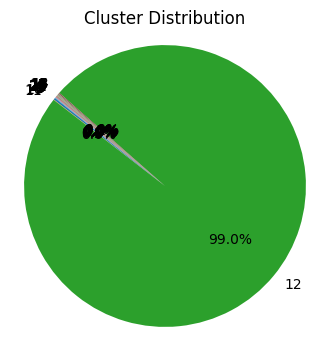

D:\Anaconda\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\base.py:1151: ConvergenceWarning: Number of distinct clusters (17) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


For k = 30:
Silhouette Score: 0.23781321209971237
Number of data points in Cluster 0: 3
Number of data points in Cluster 1: 1
Number of data points in Cluster 2: 1
Number of data points in Cluster 3: 1
Number of data points in Cluster 4: 1
Number of data points in Cluster 5: 0
Number of data points in Cluster 6: 1
Number of data points in Cluster 7: 0
Number of data points in Cluster 8: 1
Number of data points in Cluster 9: 1
Number of data points in Cluster 10: 1
Number of data points in Cluster 11: 1
Number of data points in Cluster 12: 1
Number of data points in Cluster 13: 0
Number of data points in Cluster 14: 1
Number of data points in Cluster 15: 0
Number of data points in Cluster 16: 0
Number of data points in Cluster 17: 0
Number of data points in Cluster 18: 1
Number of data points in Cluster 19: 2344
Number of data points in Cluster 20: 0
Number of data points in Cluster 21: 0
Number of data points in Cluster 22: 1
Number of data points in Cluster 23: 0
Number of data points

ValueError: 'label' must be of length 'x'

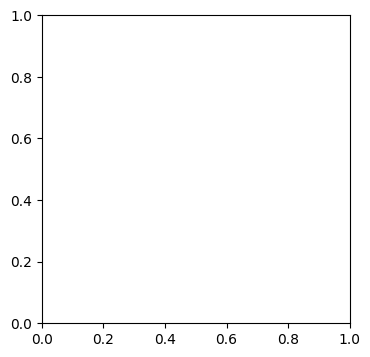

In [8]:
# Define an array of possible values for the number of clusters
k_values = [15, 20, 25, 30]

# Initialize lists to store silhouette scores and cluster sizes
silhouette_scores = []
cluster_sizes = []

# Perform spectral clustering for each value of k
for k in k_values:
    spectral_clustering = SpectralClustering(n_clusters=k, random_state=42)
    clusters = spectral_clustering.fit_predict(data)
    
    # Calculate silhouette score
    silhouette = silhouette_score(data, clusters)
    silhouette_scores.append(silhouette)
    
    # Calculate cluster sizes
    cluster_size = np.bincount(clusters)
    cluster_sizes.append(cluster_size)
    
    # Print silhouette score and cluster sizes
    print(f"For k = {k}:")
    print(f"Silhouette Score: {silhouette}")
    for i, size in enumerate(cluster_size):
        print(f"Number of data points in Cluster {i}: {size}")
    print("="*50)
    
    # Calculate the count of data points in each cluster
    cluster_counts = np.bincount(clusters)

    # Visualize cluster distribution using a pie chart
    plt.figure(figsize=(4, 4))
    plt.pie(cluster_counts, labels=range(k), autopct='%1.1f%%', startangle=140)
    plt.title('Cluster Distribution')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()


D:\Anaconda\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:392: UserWarning: Exited at iteration 845 with accuracies 
[8.03445995e-15 7.13371383e-06 7.51290500e-06 8.23011562e-06
 7.73317342e-06 6.71072782e-06 8.56215072e-06 1.24029678e-05
 1.07777891e-05 1.32284083e-05 1.10545623e-05 1.36139815e-05
 1.47681070e-05 1.45602987e-05 1.42879251e-05 1.29045018e-05
 1.28637003e-05 1.10119774e-05 1.51975905e-05 1.30043284e-05
 1.08333688e-05 1.58573699e-05 1.79441508e-05 1.68423374e-05
 2.75991448e-05 1.42550926e-05 2.04456149e-05 1.80071961e-05
 1.36851400e-05 2.44650284e-05 3.04352360e-05 2.22743869e-05
 2.53074194e-05 5.21126519e-05 3.29339656e-05 3.45781369e-05]
not reaching the requested tolerance 3.5196542739868164e-05.
Use iteration 828 instead with accuracy 
1.5984650464557205e-05.

  _, diffusion

For k = 35:
Silhouette Score: 0.24844040248499444
Number of data points in Cluster 0: 1
Number of data points in Cluster 1: 1
Number of data points in Cluster 2: 1
Number of data points in Cluster 3: 1
Number of data points in Cluster 4: 1
Number of data points in Cluster 5: 1
Number of data points in Cluster 6: 1
Number of data points in Cluster 7: 1
Number of data points in Cluster 8: 1
Number of data points in Cluster 9: 1
Number of data points in Cluster 10: 1
Number of data points in Cluster 11: 1
Number of data points in Cluster 12: 0
Number of data points in Cluster 13: 2
Number of data points in Cluster 14: 0
Number of data points in Cluster 15: 1
Number of data points in Cluster 16: 2
Number of data points in Cluster 17: 0
Number of data points in Cluster 18: 0
Number of data points in Cluster 19: 0
Number of data points in Cluster 20: 0
Number of data points in Cluster 21: 0
Number of data points in Cluster 22: 0
Number of data points in Cluster 23: 5
Number of data points in

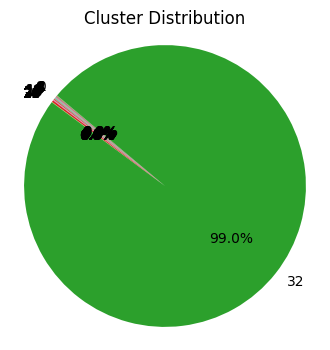

D:\Anaconda\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:392: UserWarning: Exited postprocessing with accuracies 
[2.60614843e-14 5.14887845e-06 5.94991845e-06 8.75302478e-06
 1.00083393e-05 6.10185419e-06 7.33466234e-06 8.18915183e-06
 6.97323400e-06 9.05364072e-06 1.03219137e-05 9.04857750e-06
 1.16577618e-05 1.26537969e-05 8.14876668e-06 1.23921011e-05
 9.30254976e-06 1.92741157e-05 1.49657854e-05 9.95806983e-06
 1.44016523e-05 1.35352035e-05 1.53261404e-05 1.56772026e-05
 1.40005571e-05 1.18435214e-05 1.32901926e-05 2.10004413e-05
 2.16401108e-05 2.00794404e-05 1.41504431e-05 1.91879259e-05
 1.87100461e-05 2.48046222e-05 2.21472090e-05 2.42177857e-05
 3.09510021e-05 3.23326050e-05 3.61974331e-05 2.74705341e-05
 2.37745404e-05]
not reaching the requested tolerance 3.5196542739868164e-05.
  _, 

For k = 40:
Silhouette Score: 0.17228984331619668
Number of data points in Cluster 0: 3
Number of data points in Cluster 1: 1
Number of data points in Cluster 2: 1
Number of data points in Cluster 3: 1
Number of data points in Cluster 4: 1
Number of data points in Cluster 5: 1
Number of data points in Cluster 6: 1
Number of data points in Cluster 7: 1
Number of data points in Cluster 8: 1
Number of data points in Cluster 9: 3
Number of data points in Cluster 10: 2
Number of data points in Cluster 11: 0
Number of data points in Cluster 12: 1
Number of data points in Cluster 13: 4
Number of data points in Cluster 14: 0
Number of data points in Cluster 15: 0
Number of data points in Cluster 16: 1
Number of data points in Cluster 17: 2338
Number of data points in Cluster 18: 0
Number of data points in Cluster 19: 1
Number of data points in Cluster 20: 0
Number of data points in Cluster 21: 0
Number of data points in Cluster 22: 0
Number of data points in Cluster 23: 0
Number of data points

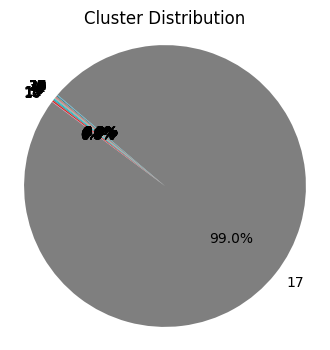

D:\Anaconda\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


KeyboardInterrupt: 

In [12]:
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.cluster import SpectralClustering
# from sklearn.metrics import silhouette_score

# Define an array of possible values for the number of clusters
k_values1 = [35, 40, 45, 50, 55, 60]

# Initialize lists to store silhouette scores and cluster sizes
silhouette_scores1 = []
cluster_sizes1 = []

# Perform spectral clustering for each value of k
for k in k_values1:
    spectral_clustering = SpectralClustering(n_clusters=k, random_state=42)
    clusters = spectral_clustering.fit_predict(data)
    
    # Calculate silhouette score
    silhouette = silhouette_score(data, clusters)
    silhouette_scores1.append(silhouette)
    
    # Calculate cluster sizes
    cluster_size = np.bincount(clusters)
    cluster_sizes1.append(cluster_size)
    
    # Print silhouette score and cluster sizes
    print(f"For k = {k}:")
    print(f"Silhouette Score: {silhouette}")
    for i, size in enumerate(cluster_size):
        print(f"Number of data points in Cluster {i}: {size}")
    print("="*50)
    
    # Calculate the count of data points in each cluster
    cluster_counts = np.bincount(clusters)

    # Visualize cluster distribution using a pie chart
    plt.figure(figsize=(4, 4))
    plt.pie(cluster_counts, labels=range(len(cluster_counts)), autopct='%1.1f%%', startangle=140)
    plt.title('Cluster Distribution')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()


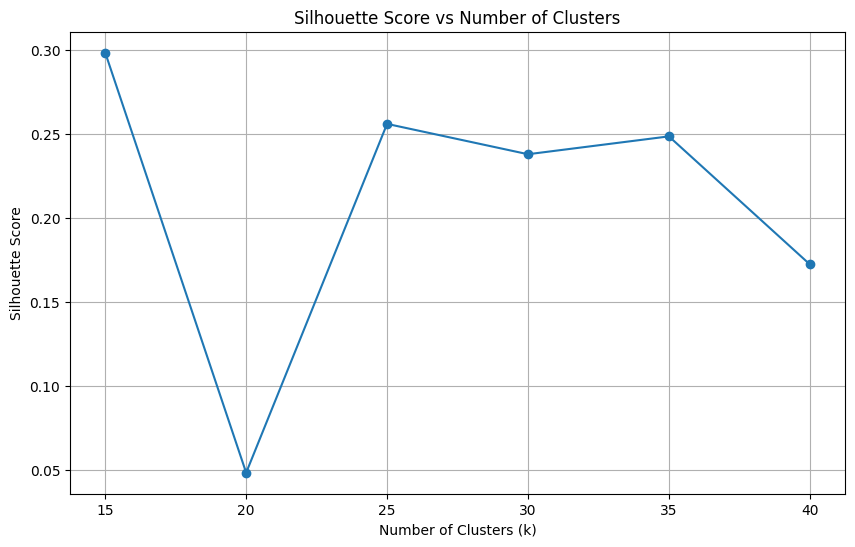

In [14]:
# Combine k_values and k_values1 into a single array
combined_k_values =  [15, 20, 25, 30, 35, 40]

# Combine silhouette_scores and silhouette_scores1 into a single array
combined_silhouette_scores = silhouette_scores + silhouette_scores1

# Plot k vs silhouette score
plt.figure(figsize=(10, 6))
plt.plot(combined_k_values, combined_silhouette_scores, marker='o')
plt.title('Silhouette Score vs Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()


In [15]:
# Find the optimal k and corresponding silhouette score
optimal_k = combined_k_values[np.argmax(combined_silhouette_scores)]
max_silhouette_score = max(combined_silhouette_scores)
print(f"\nOptimal k: {optimal_k}")
print(f"Corresponding Silhouette Score: {max_silhouette_score}")


Optimal k: 15
Corresponding Silhouette Score: 0.2982198476284165
